In [11]:
from sklearn.datasets import load_files
import numpy as np
reviews_train = load_files("aclimdb_v1/aclimdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files("aclimdb_v1/aclimdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
reviews_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
reviews_test.target_names

['neg', 'pos']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df = .15)
X = vect.fit_transform(text_train)

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, learning_method="batch", max_iter = 10, random_state = 0)
document_topics = lda.fit_transform(X)

In [9]:
lda.components_.shape

(10, 10000)

In [12]:
sorting = np.argsort(lda.components_, axis = 1)[:, ::-1]

feature_names = np.array(vect.get_feature_names_out())

In [13]:
import mglearn

mglearn.tools.print_topics(topics = range(10), feature_names = feature_names, 
                           sorting = sorting, topics_per_chunk = 5, n_words = 10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          saw           
real          world         guy           series        didn          
performance   book          comedy        episode       am            
young         us            thing         tv            thought       
family        our           actually      episodes      dvd           
both          documentary   worst         shows         years         
director      work          re            season        got           
role          american      nothing       new           again         
actors        history       actors        years         now           
beautiful     point         want          family        watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [16]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method = "batch", 
                                   max_iter = 10, random_state = 0)
document_topics100 = lda100.fit_transform(X)

In [17]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics = topics, feature_names = feature_names, 
                           sorting = sorting, topics_per_chunk = 7, n_words = 20)


topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
horror        didn          hitler        car           beautiful     performance   japanese      
de            worst         german        gets          romantic      role          excellent     
thriller      thing         years         police        young         play          highly        
suspense      boring        nazi          guy           between       actor         performances  
atmosphere    script        young         killed        old           actors        human         
mystery       horrible      midnight      kill          feel          cast          culture       
house         re            joe           around        saw           oscar         actors        
director      wasn          modesty       down          wonderful     performances  truly         
quite     

In [18]:
music = np.argsort(document_topics100[:, 45])[::-1]

for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"After repeated listenings to the CD soundtrack, I knew I wanted this film, got it for Christmas and I was amazed. Marc Bolan had such charisma, i can't describe it.\n"
b'I love this movie and never get tired of watching. The music in it is great.\n'
b'I love this movie!!! Purple Rain came out the year I was born and it has had my heart since I can remember. Prince is so tight in this movie.\n'
b"The funky, yet strictly second-tier British glam-rock band 

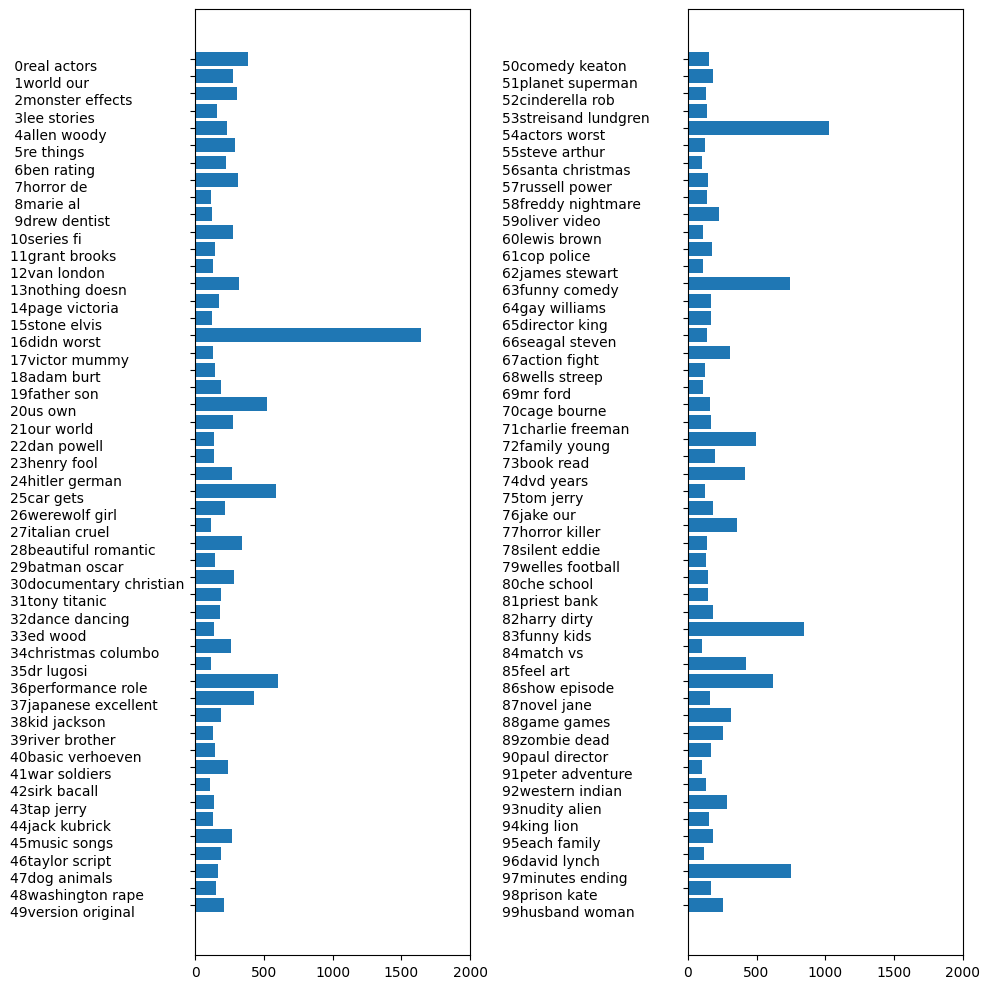

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis = 0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha = "left", va = "top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()